In [30]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.fftpack import fft, fftfreq
from scipy import signal
import scipy.special as sp

import pylab as py
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jv.html#scipy.special.jv

from ipywidgets import *
%matplotlib inline
plt.close('all')
plt.rcParams['figure.figsize'] = [20, 6]





In [63]:
def Fourier_Signal(stype='square', duty = 0.5, Ns = 20, a = 10  ):
    # Defino el vector de phase del muestreo
    p  = np.arange(0,2*np.pi, 2*np.pi/Ns)
    
    if stype == 'pulse': 
        x  =  np.array([xi*(xi >(duty-0.5))+0*(xi <=(duty-0.5)) for xi in np.cos(p)])
    if stype == 'square': 
        x  =  1+signal.square(p,duty=duty)
        x  = np.append(x , np.zeros(len(p)))
        p  = np.append(p, p+2*np.pi)
    if stype == 'sawtooth': 
        x  =  0.5+signal.sawtooth(p+np.pi/2,width=duty) 
    
    # Transformada de Fourier
    af   = list()
    bf   = list()
    af.append(sum([x[i]    for i in range(Ns)])/Ns*2)
    bf.append(sum([0       for i in range(Ns)])/Ns*2)

    for n in range(int(Ns/2)):
        af.append(sum([x[i]*np.cos(p[i]*(n+1))    for i in range(Ns)])/Ns*2)
        bf.append(sum([x[i]*np.sin(p[i]*(n+1))    for i in range(Ns)])/Ns*2)
        
    # Transformada inversa    
    xt  = np.array([af[0]/2    for i in range(Ns)])    
    for n,xfi in enumerate(af[1:a]):
        xta = np.array([af[n+1]*np.cos(p[i]*(n+1))    for i in range(Ns)])
        xtb = np.array([1j*bf[n+1]*np.sin(p[i]*(n+1))    for i in range(Ns)])   
        xt  = xt + xta + xtb
        
    plt.subplot(2,1,1)
    plt.plot(p,x);
    plt.plot(p,x,'ro');
    plt.plot(p,x,'r-');
    plt.plot(p,xt);
    plt.grid()
    plt.title('Señal en tiempo');
    plt.xlabel('Tiempo(s)'); plt.ylabel('Amplitud')
    X = (fft(x)/Ns)
    frq = fftfreq(len(X), 2*np.pi/Ns)  # Recuperamos las frecuencias
    
    plt.subplot(2,1,2)
    #plt.plot(0,af[0],'ro' )  # continua 
    #plt.plot(0,af[0],'r-' )  # continua 
    plt.stem( frq, np.abs(X) )  # Representamos la parte imaginaria 
    #for n,xfi in enumerate(af[1:a]):
    #    plt.plot(n+1,af[n], 'go')
    #    plt.plot(n+1,bf[n], 'bo')
   
    plt.title('Magnitud de espectro')
    plt.xlabel('Armonico'); 
    plt.ylabel('Magnitud')
    plt.grid()
    plt.tight_layout()





interactive(children=(Dropdown(description='stype', index=1, options=('pulse', 'square', 'sawtooth'), value='s…

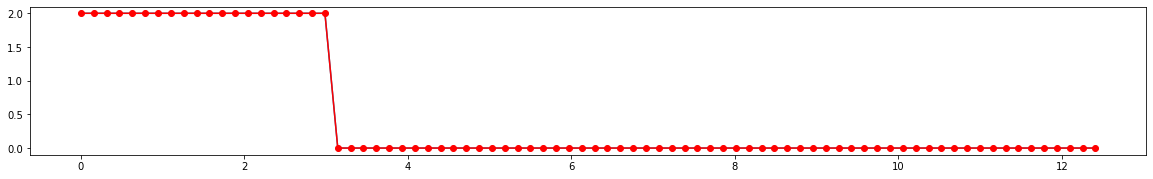

In [64]:
interact (Fourier_Signal,stype=['pulse','square','sawtooth'],duty = (0.1,0.9,0.1),Ns = fixed(40), a=(0,10,1));